# Face Merge

This code presents the use of facial recognition, facial alignment, and image blending to generate facial averages. 
Input faces are downloaded from instagram's __[#face](https://www.instagram.com/explore/tags/face/?hl=en)__ feed. This requires the use of the __[instaloader](https://pypi.org/project/instaloader/)__ package and others as listed in the imports below. 

Here are some examples of the kinds of faces we are going to generate.

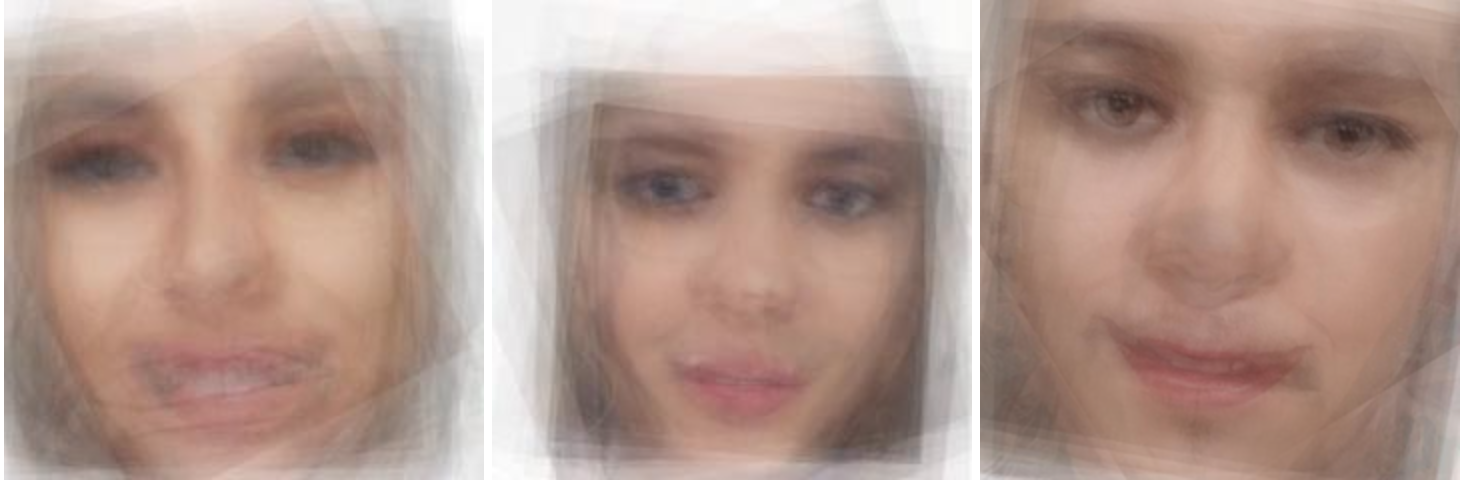

In [52]:
Image(filename = ('/Users/cshultz/Face-Merge/samplefaces.png'))

In [44]:
import os, numpy, face_recognition
from PIL import Image
import facemesh as fm
import cv2
import random
from IPython.core.display import Image

### Step 1: Download 30 faces from Instagram's __[#face](https://www.instagram.com/explore/tags/face/?hl=en)__ feed and remove the non-faces.

_Note: the code can be modified to download any number of faces (line 3 below). 30 is practical for execution time, but as the number of faces increases, the quality of the facial averages does as well. 

In [33]:
def downloadFaces(): #Download 30 #face images
    print("Downloading Images from IG")
    os.system('/Users/cshultz/anaconda3/bin/instaloader \"#face\" -c 30')

    # Remove non JPG files and images without faces
    folder = '/Users/cshultz/Face-Merge/#face'
    for f in os.listdir(folder):
        if not f.endswith('.jpg'):  # removing non-JPG files
            os.remove(folder + '/' + f)
        else:
            im = face_recognition.load_image_file(folder + '/' + f)
            face_loc = face_recognition.face_locations(im)
            if len(face_loc) == 0:  # removing photos without faces
                os.remove(folder + '/' + f)
            else:
                # Autocrop the faces here
                top = face_loc[0][0]
                right = face_loc[0][1]
                bottom = face_loc[0][2]
                left = face_loc[0][3]

                # Access the Cropped Image and Save It
                face_image = im[top:bottom, left:right]
                pil_image = Image.fromarray(face_image)
                pil_image.save(folder + '/' + f)

In [34]:
downloadFaces()

We can list the contents of the directory to confirm that the images downloaded successfully. They have also been auto-cropped to focus only on the face.

In [35]:
folder = '/Users/cshultz/Face-Merge/#face'
os.listdir(folder)

['2018-08-16_00-05-38_UTC_5.jpg',
 '2018-08-16_00-05-38_UTC_1.jpg',
 '2018-08-16_00-05-42_UTC.jpg',
 '2018-08-16_00-05-38_UTC_3.jpg',
 '2018-08-16_00-05-38_UTC_2.jpg',
 '2018-08-16_00-05-39_UTC.jpg',
 '2018-08-16_00-04-46_UTC.jpg',
 '2018-08-16_00-04-43_UTC_1.jpg',
 '2018-08-16_00-07-07_UTC.jpg',
 '2018-08-16_00-04-47_UTC.jpg',
 '2018-08-16_00-06-48_UTC.jpg',
 '2018-08-16_00-05-00_UTC.jpg',
 '2018-08-16_00-06-50_UTC.jpg',
 '2018-08-16_00-06-04_UTC.jpg',
 '2018-08-16_00-06-39_UTC.jpg',
 '2018-08-16_00-06-07_UTC.jpg',
 '2018-08-16_00-06-17_UTC.jpg',
 '2018-08-16_00-06-42_UTC_2.jpg',
 '2018-08-16_00-07-27_UTC.jpg']

From the 30 images downloaded, 19 real faces were identified in the facial recognition algorithm. All other photos were removed. 

### Step 2: Convert the face images to .PNG files so that they can be processed.

In [36]:
def convertToPNG():
    print("Converting to PNG for Modification")
    folder = '/Users/cshultz/Face-Merge/#face' # Convert the images to PNG files
    i = 0
    for f in os.listdir(folder):
        if f == ".DS_Store":
            os.remove(folder + '/' + f)
        else: 
            im = Image.open(folder + '/' + f)
            im.save(folder + '/' + 'Foto' + str(i) + '.png')
            i += 1
            os.remove(folder + '/' + f)
convertToPNG()

Converting to PNG for Modification


Let's check to confirm that the files were converted.

In [37]:
folder = '/Users/cshultz/Face-Merge/#face'
os.listdir(folder)

['Foto0.png',
 'Foto1.png',
 'Foto3.png',
 'Foto2.png',
 'Foto6.png',
 'Foto7.png',
 'Foto18.png',
 'Foto5.png',
 'Foto4.png',
 'Foto9.png',
 'Foto14.png',
 'Foto15.png',
 'Foto8.png',
 'Foto17.png',
 'Foto16.png',
 'Foto12.png',
 'Foto13.png',
 'Foto11.png',
 'Foto10.png']

### Step 3: Resize for Instagram (640x640)

This code was originally developed as part of a fully automated Instagram account called 'autofacebot.' The downloaded images vary in size. To stanardize, we resize them to fit the 640x640 instagram size.

In [38]:
def resizeForIG():
    print("Resizing for Instagram")
    i = 0
    folder = '/Users/cshultz/Face-Merge/#face'
    for f in os.listdir(folder):
        im1 = Image.open(folder + '/' + f)
        width = 640
        height = 640
        im2 = im1.resize((width, height), Image.NEAREST)
        im2.save(folder + '/' + 'Foto' + str(i) + '.png')
        i += 1
resizeForIG()

Resizing for Instagram


### Step 4: Align the Faces
Before we can average the faces, we need to align the features (nose, eyes, etc.). The printed text is a result of the algorithm used to align faces and it's message is not relevant here.

In [39]:
def alignFaces():
    #Instantiate the class
    fullSet = '/Users/cshultz/Face-Merge/#face'
    faceReader = fm.FaceMesh('shape_predictor_68_face_landmarks.dat')
    outputImgs = faceReader.align(fullSet)

    #Remove the old Fotos
    folder = '/Users/cshultz/Face-Merge/#face'
    for f in os.listdir(folder):
        os.remove(folder + '/' + f)

    #Save all the aligned images to output folder
    counter = 0
    for img in outputImgs:
        counter+= 1
        cv2.imwrite("/Users/cshultz/Face-Merge/#face/Foto" + str(counter) + ".png", img.astype('uint8'))
alignFaces()

0 : /Users/cshultz/Face-Merge/#face/Foto0.png
[+] Opened image from: /Users/cshultz/Face-Merge/#face/Foto0.png
[+] Number of faces found: 1
1 : /Users/cshultz/Face-Merge/#face/Foto1.png
[+] Opened image from: /Users/cshultz/Face-Merge/#face/Foto1.png
[+] Number of faces found: 1
2 : /Users/cshultz/Face-Merge/#face/Foto3.png
[+] Opened image from: /Users/cshultz/Face-Merge/#face/Foto3.png
[+] Number of faces found: 1
3 : /Users/cshultz/Face-Merge/#face/Foto2.png
[+] Opened image from: /Users/cshultz/Face-Merge/#face/Foto2.png
[+] Number of faces found: 1
4 : /Users/cshultz/Face-Merge/#face/Foto6.png
[+] Opened image from: /Users/cshultz/Face-Merge/#face/Foto6.png
[+] Number of faces found: 1
5 : /Users/cshultz/Face-Merge/#face/Foto7.png
[+] Opened image from: /Users/cshultz/Face-Merge/#face/Foto7.png
[+] Number of faces found: 0
5 : /Users/cshultz/Face-Merge/#face/Foto18.png
[+] Opened image from: /Users/cshultz/Face-Merge/#face/Foto18.png
[+] Number of faces found: 0
5 : /Users/cshultz

At this point, the user can go to the directory and see that all facial images have been rotated and aligned.

### Step 5: Average the Faces to Generate a New Face

In [40]:
def averageFaces():
    # Set the directory
    os.chdir('/Users/cshultz/Face-Merge/#face')

    # Access all PNG files in directory
    allfiles = os.listdir(os.getcwd())
    imlist = [filename for filename in allfiles if filename[-4:] in [".png", ".PNG"]]

    # Assuming all images are the same size, get dimensions of first image
    w, h = Image.open(imlist[0]).size
    N = len(imlist)

    # Create a numpy array of floats to store the average (assume RGB images)
    arr = numpy.zeros((h, w, 3), numpy.float)

    # Build up average pixel intensities, casting each image as an array of floats
    for im in imlist:
        imarr = numpy.array(Image.open(im), dtype=numpy.float)
        arr = arr + imarr / N

    # Round values in array and cast as 8-bit integer
    arr = numpy.array(numpy.round(arr), dtype=numpy.uint8)

    # Generate, save and preview final image
    out = Image.fromarray(arr, mode="RGB")
    out.save("Average.png")
    os.chdir('/Users/cshultz/Face-Merge')
averageFaces()

### Step 6: Save the Average Face and Delete the Input Faces

In [41]:
def saveAverage():
    os.chdir('/Users/cshultz/Face-Merge/#face')
    im = Image.open('Average.png')
    os.chdir('/Users/cshultz/Face-Merge/Averages')
    i = len(os.listdir()) + 1
    im.save('/Users/cshultz/Face-Merge/Averages' + '/' + 'AvgFace' + str(i) + '.jpg')

def deleteFaceFolder():
    folder = '/Users/cshultz/Face-Merge/#face'
    for f in os.listdir(folder):
        os.remove(folder + '/' + f)
    os.rmdir(folder)
    os.chdir('/Users/cshultz/Face-Merge')
    
saveAverage()
deleteFaceFolder()

### Step 7: Look at the Resulting Face!

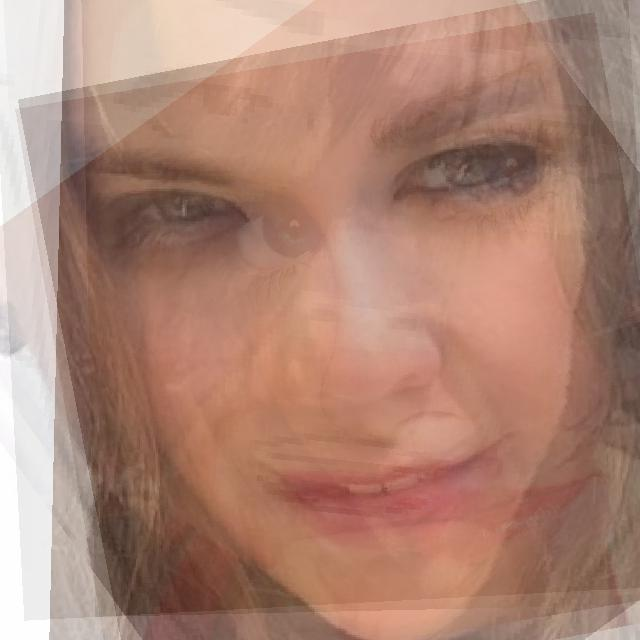

In [45]:
Image(filename = ('/Users/cshultz/Face-Merge/Averages/AvgFace2.jpg'))